In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="Set2")


In [2]:
df = pd.read_csv('../Telco-Customer-Churn.csv')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
df.isna().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
# Fill missing TotalCharges for new customers (tenure = 0)
df.loc[df['tenure'] == 0, 'TotalCharges'] = df.loc[df['tenure'] == 0, 'MonthlyCharges']

# Verify
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Columns with Yes/No data
yes_no_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'Churn'
]

# Convert Yes/No to 1/0
df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})

# Verify again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


/var/folders/dj/22d3g2qd0fb3f2yd0hzy31f80000gn/T/ipykernel_53098/2684575421.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_cols] = df[yes_no_cols].replace({'Yes': 1, 'No': 0})


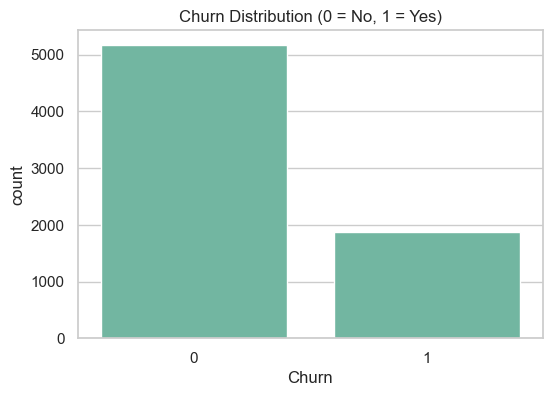

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

df['Churn'].value_counts(normalize=True)*100


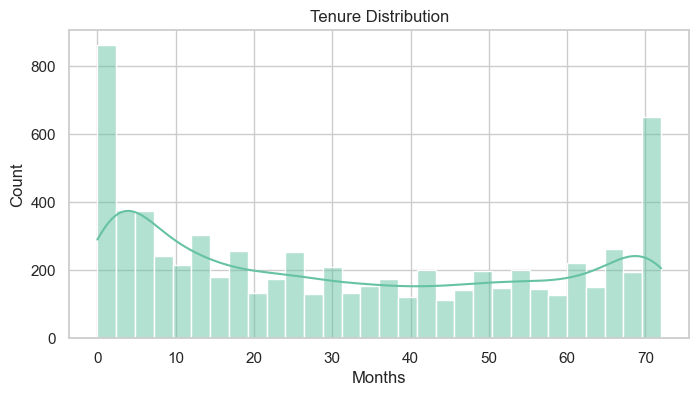

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Months")
plt.show()


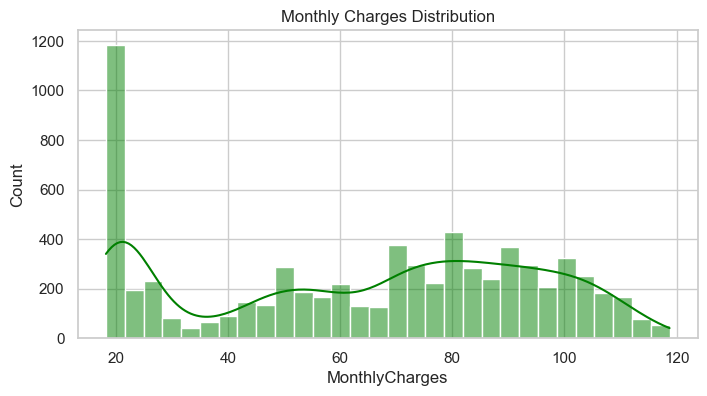

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title("Monthly Charges Distribution")
plt.show()


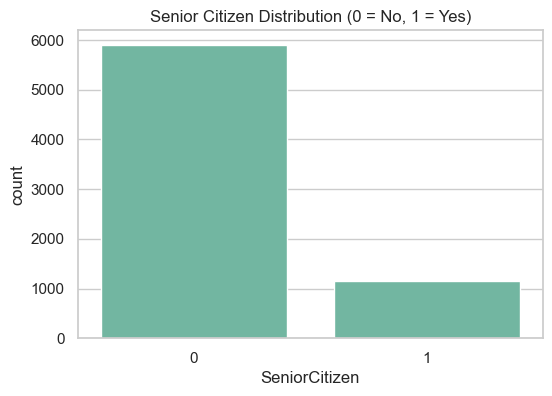

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', data=df)
plt.title("Senior Citizen Distribution (0 = No, 1 = Yes)")
plt.show()


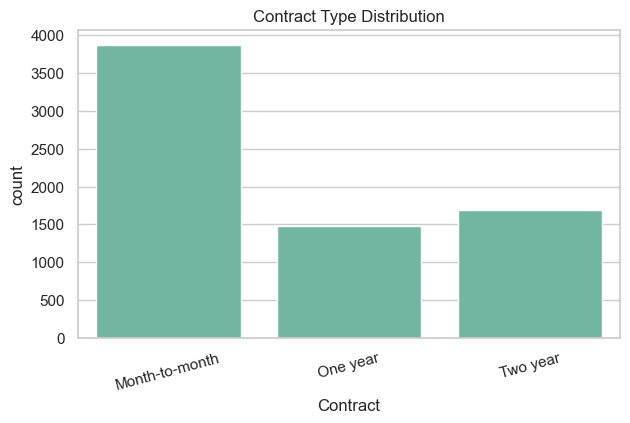

In [10]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', data=df)
plt.title("Contract Type Distribution")
plt.xticks(rotation=15)
plt.show()


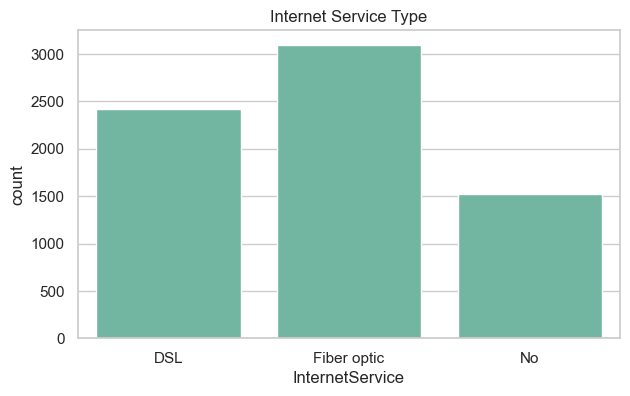

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(x='InternetService', data=df)
plt.title("Internet Service Type")
plt.show()


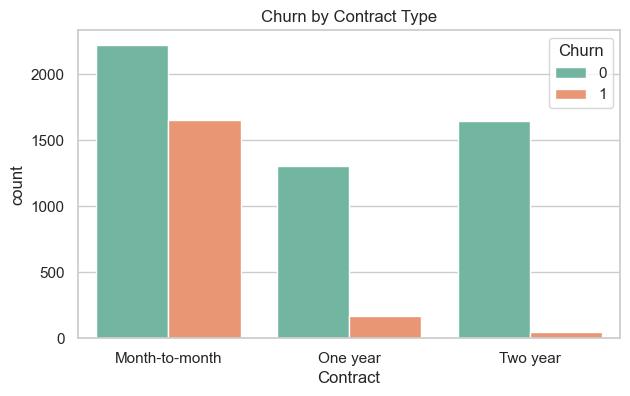

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=0)
plt.show()


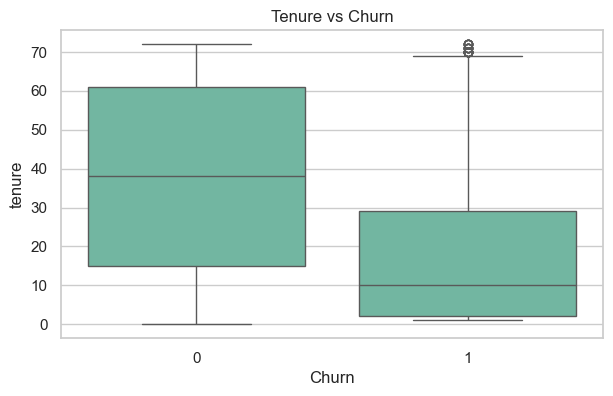

In [13]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


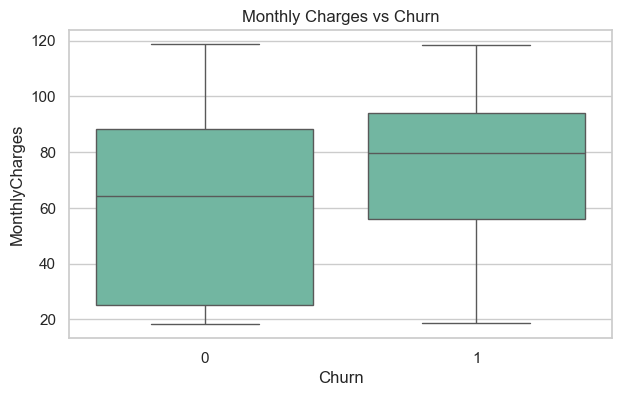

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


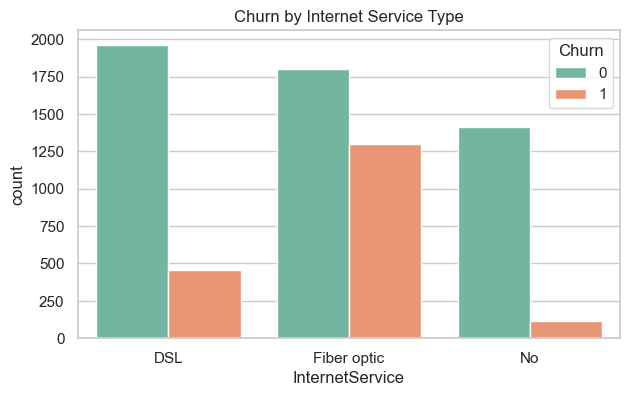

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service Type")
plt.show()


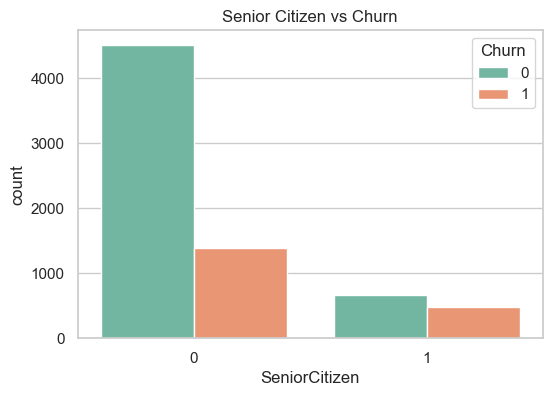

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Senior Citizen vs Churn")
plt.show()


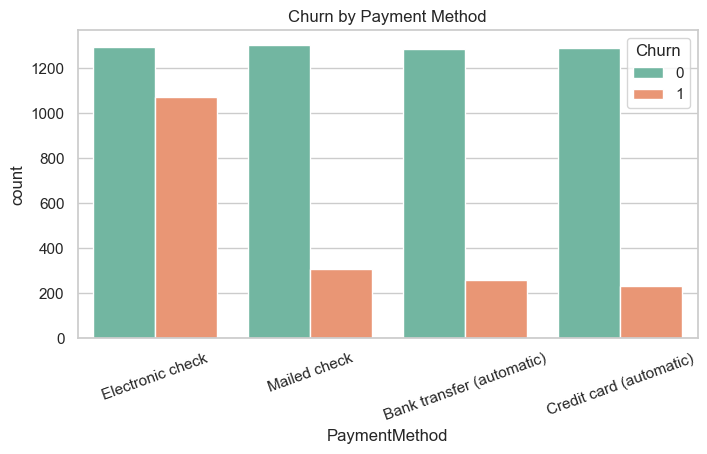

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=20)
plt.show()


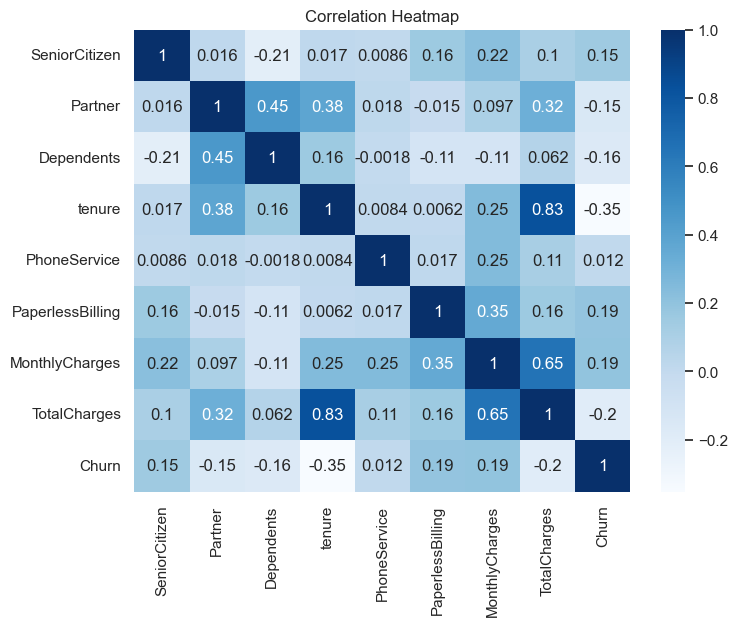

In [18]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()
